## Stratification evolution at different locations of the domain

Num approximation to calculate $N^2$:

$$N^2\approx -\frac{g}{\rho_0} \frac{\rho_{i+1}-\rho_{i-1}}{z_{i+1}-z_{i-1}}$$

and $\rho$ is calculated as 

In [114]:
import gsw 

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

# import my modules
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt 

In [115]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')

In [116]:
#Exp
#CGrid = '/Users/Karina/Research/PhD/Tracers/TemporaryData/BARKLEY/run01/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.


phiHyd = '/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run02/phiHydGlob.nc'
pout = Dataset(phiHyd)
CGridOut = Dataset(CGrid)

#for dimobj in pout.variables.values():
#    print dimobj



In [117]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 3 # number of tracers in run

rc = CGridOut.variables['RC']

xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGrid, 'HFacC')
MaskC = rout.getMask(CGrid, 'HFacC')
rA = rout.getField(CGrid, 'rA')

Tp = pout.variables['T']
bathy = rout.getField(CGrid, 'Depth')
#print(drC[:])
#print(np.shape(drC))

## Stations

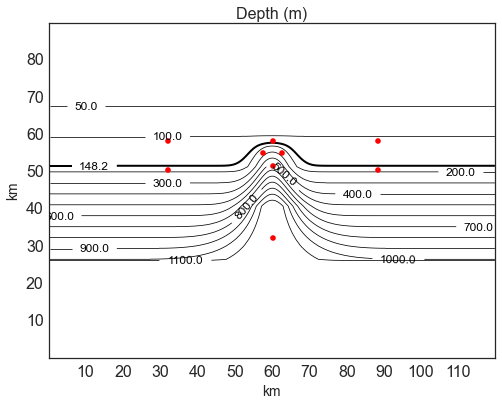

In [154]:
sns.set(context='paper', style='white', font='sans-serif', font_scale=2)

fig = plt.figure(figsize=(8,6))

lev = range(200,1200,100)

levels = [50,100,148.17]+lev
CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[0.75,0.75,2,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=12)

plt.plot(xc[262,60],yc[262,60],'ro',
         xc[262,300],yc[262,300],'ro',
         xc[220,300],yc[220,300],'ro',
         xc[220,60],yc[220,60],'ro',
         xc[262,180],yc[262,180],'ro',
         xc[227,180],yc[227,180],'ro',
         xc[100,180],yc[100,180],'ro',
         xc[245,200],yc[245,200],'ro',
         xc[245,160],yc[245,160],'ro')
    
plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)



In [158]:
ys = [262,220,262,227,100,245,245,262,220]
xs = [60,60,180,180,180,160,200,300,300]
stations = ['UpSh','UpSl','CH','CM','CO','UpC','DnC','DnSh','DnSl']
print('UpSh = upstream shelf ','UpSl= upstream slope','CH = canyon head','CM = canyon mouth',
      'CO = open water','UpC = Uptream canyon','DnC = downstream canyon',
      'DnSh = downstream shelf','DnSl = downstream slope')

('UpSh = upstream shelf ', 'UpSl= upstream slope', 'CH = canyon head', 'CM = canyon mouth', 'CO = open water', 'UpC = Uptream canyon', 'DnC = downstream canyon', 'DnSh = downstream shelf', 'DnSl = downstream slope')


In [168]:
#All experiments in CNT and 3D including no canyon one (run07)
expList = [#'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run09',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run10',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07']
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07']
expNames = [#'CNTDIFF_run02',
           'CNTDIFF_run03',
           #'CNTDIFF_run04',
           #'CNTDIFF_run09',
           #'CNTDIFF_run10',
           'CNTDIFF_run11',
           'CNTDIFF_run12',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']
           #'CNTDIFF_run07']

In [121]:
RhoRef = np.squeeze(rdmds('/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run02/RhoRef'))
#print(RhoRef) # it is constant 999.79998779

/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run02/RhoRef.meta


In [122]:
nzlim = 30
zfin = 30
xi = 180
yi = 50
xh1=120
xh2=240
yh1=227
yh2=267
g = 9.81 # ms^-2

alpha = 1.7E-4/237 # 1/degC
beta = 7.6E-4
          


In [160]:
times = [0,6,10,14,18]

for exp,runs in zip(expList,expNames):
    
    CState = ('%s/stateGlob.nc' %exp) 
        
    Temp = rout.getField(CState,'Temp')
    S = rout.getField(CState,'S')
    P = rout.getField(phiHyd,'phiHyd')
        
        
    maskExp = mpt.maskExpand(MaskC,Temp)
    TempMask=np.ma.array(Temp,mask=maskExp)   
    SMask=np.ma.array(S,mask=maskExp)   
    
    for yi,xi,sname in zip(ys,xs,stations): # station indices
        N2 = np.ma.empty((len(times),nz-2))
        ii = 0
        
        for tt in times:  
            
            #Linear eq. of state 
            rho = RhoRef*(np.ones(np.shape(RhoRef)) - alpha*(TempMask[tt,:,yi,xi]) + beta*(SMask[tt,:,yi,xi]))
            # N^2 for each station
            N2[ii,:] = (-g/RhoRef[0])*((rho[2:] - rho[:-2])/(-drC[3:]-drC[2:-1]))
            #N2[ii,:] = (-g/RhoRef[0])*((rho[2:] - rho[:-2])/(-drC[3:]-drC[2:-1]))
            
            ii = ii+1
        
        raw_data = {'drC' : drC[2:-1],'N2_tt00': N2[0,:],'N2_tt06': N2[1,:],'N2_tt10': N2[2,:],'N2_tt14': N2[3,:],'N2_tt18': N2[4,:]}
        df = pd.DataFrame(raw_data, columns = ['drC', 'N2_tt00','N2_tt06','N2_tt10','N2_tt14','N2_tt18'])
        filename1 = ('results/metricsDataFrames/N2_%s_%s.csv' % (runs,sname))
        df.to_csv(filename1)
        #print(filename1)
    
        
        


In [171]:
def PlotN2(ax,tt,station,Tr,Tr0,z,runname):
    
    sns.set(context='notebook', style='white', font='sans-serif', font_scale=1)
    sns.set_palette('Set1_r',7)
    
        
    ax.plot(Tr,z,'-o',label = ' %s ' %runname)
    ax.plot(Tr0,z,'--', color = 'gray' )
    
    ax.set_title('%s day = %s' %(station,tt/2.0))
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('$N^2$ ($10^{-5} s^{-2}$)')
    ax.legend(loc=0)
    ax.set_ylim([-250,0])
    
        
    

    #fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

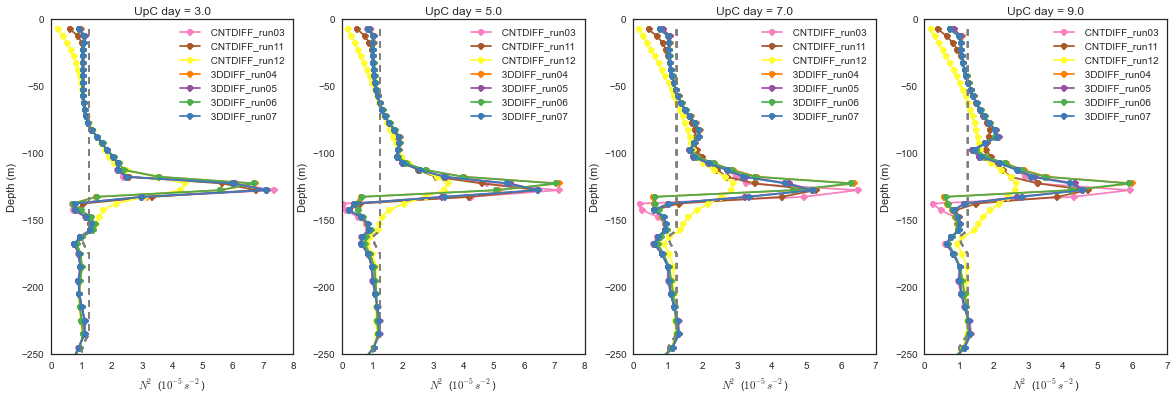

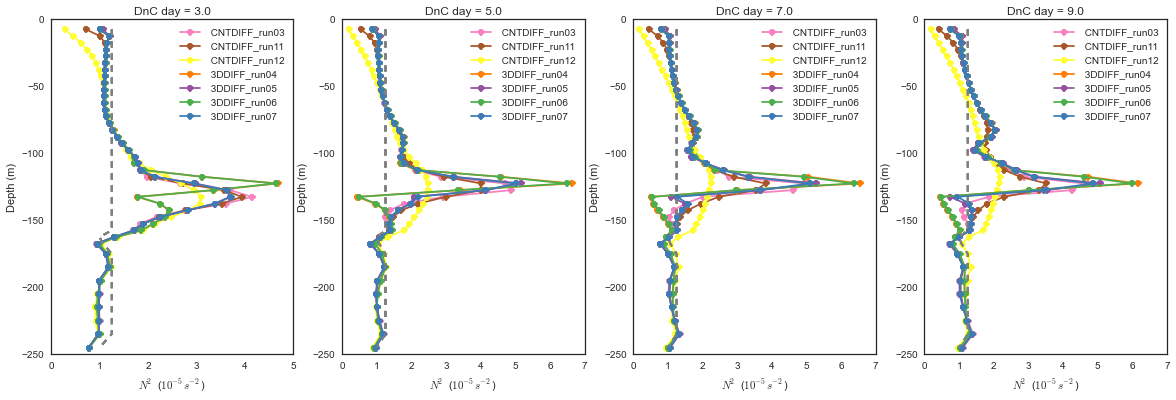

In [172]:
for sname in stations:
    
    fields = ['N2_tt00','N2_tt06','N2_tt10','N2_tt14','N2_tt18']
    
    fig1,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 6))   
    
    for runs in expNames:
        N2 = np.zeros((5,88))
        
        filename1 = ('results/metricsDataFrames/N2_%s_%s.csv' % (runs,sname))
        #print(filename1)
        df = pd.read_csv(filename1)
        
        for tt,key in zip(range(5),fields):
            N2[tt,:] = df[key]
        
        
        PlotN2(ax1,6,sname,N2[1,:]/1E-5,N2[0,:]/1E-5,rc[1:-1],runs)
        PlotN2(ax2,10,sname,N2[2,:]/1E-5,N2[0,:]/1E-5,rc[1:-1],runs)
        PlotN2(ax3,14,sname,N2[3,:]/1E-5,N2[0,:]/1E-5,rc[1:-1],runs)
        PlotN2(ax4,18,sname,N2[4,:]/1E-5,N2[0,:]/1E-5,rc[1:-1],runs)
        
            
    plt.show()